=====DATSCIW261 ASSIGNMENT #10=====


MIDS UC Berkeley, Machine Learning at Scale

DATSCIW261 ASSIGNMENT #10

#### Hetal Chandaria (hetalchandaria@berkeley.edu) 

W261 - 2 , ASSIGNMENT #10

Submission Date : 

Group : 4

### Setting up spark for use with iPython

In [36]:
import os
import sys 

spark_home = os.environ['SPARK_HOME'] = '/Users/hetal/programming/205/spark-1.6.1-bin-hadoop2.6'

if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.9-src.zip'))
execfile(os.path.join(spark_home,'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.6.1
      /_/

Using Python version 2.7.11 (default, Dec  6 2015 18:57:58)
SparkContext available as sc, HiveContext available as sqlContext.


### ===HW 10.0: Short answer questions===

What is Apache Spark and how is it different to Apache Hadoop? 

Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, ...... languages (list languages). 

Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ????? in a distributed manner.

What is an RDD and show a fun example of creating one and bringing the first element back to the driver program.

What is lazy evaluation and give an intuitoive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation.

<h2>
<span style="color: blue"> Answer</span>
</h2>

######  <b>What is Apache Spark and how is it different to Apache Hadoop? </b>

Apache Spark is a cluster computing platform designed to be fast and general-purpose.

One of the main features Spark offers for speed is the ability to run computations in memory, but the system is also more efficient than MapReduce for complex applications running on disk.
On the generality side, Spark is designed to cover a wide range of workloads that previously required separate distributed systems, including batch applications, iterative algorithms, interactive queries, and streaming. By supporting these workloads in the same engine, Spark makes it easy and inexpensive to combine different processing types, which is often necessary in production data analysis pipelines.



#####  Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, <b> <span style="color: brown" >Python, Scala , SQL</span></b> languages (list languages). 

Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or <b><span style="color: brown" >Yarn</span></b> in a distributed manner.

###### What is an RDD and show a fun example of creating one and bringing the first element back to the driver program.

Resilient Distributed Datasets (RDDs), are a distributed memory abstraction that lets programmers perform in-memory computations on large clusters in a fault-tolerant manner.

In Spark, RDDs, represents an immutable, partitioned collection of elements that can be operated on in parallel.

In [6]:
sample = sc.parallelize(["Spark","Hadoop","Tez"])
sample.first()

'Spark'

##### What is lazy evaluation and give an intuitive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation.

Transformations on RDDs are lazily evaluated, meaning that Spark will not begin to execute until it sees an action.

Lazy evaluation means that when we call a transformation on an RDD (for instance, calling map()), the operation is not immediately performed. Instead, Spark internally records metadata to indicate that this operation has been requested. Rather than thinking of an RDD as containing specific data, it is best to think of each RDD as consisting of instructions on how to compute the data that we build up through transformations.

Example : We have lot of software programs installed on our computer. When we boot our machine, not all programs are started. Unless we go and open a particular application, the program is not bought up. This is example of lazy evaluation. 



### ===HW 10.1: ===
In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document as a the example document to run an experiment.  Report the following: provide a sorted list of tokens in decreasing order of frequency of occurence.

<h2>
<span style="color: blue"> Answer</span>
</h2>

In [21]:
import re

# lines = sc.textFile('charles_dickens.txt')
lines = sc.textFile('MIDS-MLS-HW-10.txt')

def emitWordCounts(line):
    wordCounts = {}
    for w in re.findall(r"[\w]+",line):
        if wordCounts.has_key(w):
            wordCounts[w]=wordCounts[w]+1
        else:
            wordCounts[w]=1
    for key, value in  wordCounts.items():
        print key,":", value      
    return (wordCounts.items())  

counts = lines.flatMap(emitWordCounts).reduceByKey(lambda a, b: a + b)
# print counts.collect()

# In descending order
''' The first parameter tells number of elements
    to be present in output.
''' 
counts.takeOrdered(20, key=lambda x: -x[1])
# In Ascending order
# counts.takeOrdered(10, key=lambda x: x[1])



[(u'the', 46),
 (u'and', 24),
 (u'in', 18),
 (u'of', 17),
 (u'10', 15),
 (u'a', 13),
 (u'HW', 13),
 (u'for', 11),
 (u'data', 11),
 (u'code', 10),
 (u'to', 9),
 (u'clusters', 9),
 (u'is', 8),
 (u'KMeans', 8),
 (u'1', 7),
 (u'3', 7),
 (u'HW10', 7),
 (u'with', 7),
 (u'this', 7),
 (u'Using', 7)]

### HW 10.1.1
Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.



<h2>
<span style="color: blue"> Answer</span>
</h2>

In [22]:
import re

# lines = sc.textFile('charles_dickens.txt')
lines = sc.textFile('MIDS-MLS-HW-10.txt')

def emitWordCounts(line):
    wordCounts = {}
    for w in re.findall(r"\b[a-z]+\b",line):
        if wordCounts.has_key(w):
            wordCounts[w]=wordCounts[w]+1
        else:
            wordCounts[w]=1
    for key, value in  wordCounts.items():
        print key,":", value      
    return (wordCounts.items())  

counts = lines.flatMap(emitWordCounts).reduceByKey(lambda a, b: a + b)
# print counts.collect()

# In descending order
''' The first parameter tells number of elements
    to be present in output.
''' 
counts.takeOrdered(20, key=lambda x: -x[1])
# In Ascending order
# counts.takeOrdered(10, key=lambda x: x[1])

[(u'the', 46),
 (u'and', 24),
 (u'in', 18),
 (u'of', 17),
 (u'a', 13),
 (u'for', 11),
 (u'data', 11),
 (u'code', 10),
 (u'to', 9),
 (u'clusters', 9),
 (u'is', 8),
 (u'with', 7),
 (u'this', 7),
 (u'on', 7),
 (u'your', 7),
 (u's', 6),
 (u'com', 6),
 (u'https', 6),
 (u'x', 6),
 (u'iterations', 5)]

### ===HW 10.2: KMeans a la MLLib ===

In [118]:
# 
# Using the following  MLlib-centric KMeans code snippet: 

from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return (sum([x**2 for x in (point - center)])) # remove sqrt from here as we need to computer only within set sum of squared errors

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
# clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")


# NOTE  kmeans_data.txt is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

# Run this code snippet and list the clusters that your find and compute the Within Set Sum of Squared Errors 
# for the found clusters. Comment on your findings.

Within Set Sum of Squared Error = 0.12


<h2>
<span style="color: blue"> Answer</span>
</h2>

In [62]:
print 'Cluster centers using Spark Mlib library: {}'.format(clusters.centers)

Cluster centers using Spark Mlib library: [array([ 9.1,  9.1,  9.1]), array([ 0.1,  0.1,  0.1])]


In [76]:
print 'Within Set sum of Squared Errors {}'.format(str(WSSSE))

Within Set sum of Squared Errors 0.12


In [74]:
# computeCost(rdd)[source]
# Return the K-means cost (sum of squared distances of points to their nearest center) for this model on the given data.
print 'Cost computed using Spark Mlib Library: {}'.format(clusters.computeCost(parsedData))

Cost computed using Spark Mlib Library: 0.12


### ==HW 10.3: ===
Download the following KMeans notebook:

https://www.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb?dl=0

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

  -- plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
  -- in each plot please report the Within Set Sum of Squared Errors for the found clusters. Comment on the progress of this measure as 
  the KMEans algorithms runs for more iterations

<h2>
<span style="color: blue"> Answer</span>
</h2>

In [79]:
#generate Data 
%matplotlib inline
import numpy as np
import pylab 
import json
size1 = size2 = size3 = 100 #change the size to 100 v/s 1000
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

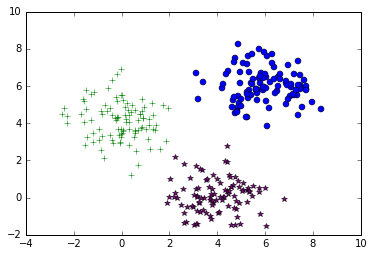

In [91]:
#plot the original data
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'purple')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

In [96]:
#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'purple',alpha=0.5)
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue',alpha=0.5)
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'green',alpha=0.5)
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

Iteration 1
Within Set Sum of Squared Error (WSSSE) = 1835.47252707
Cluster Centers:
[ 1.27799673  4.84321436]
[ 2.82041625 -0.39060521]
[ 5.37230429  2.95360788]


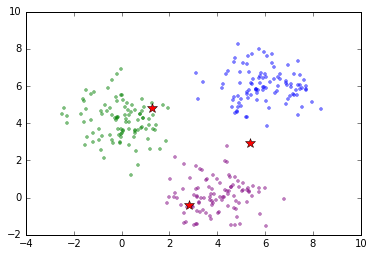

Iteration 10
Within Set Sum of Squared Error (WSSSE) = 578.860382661
Cluster Centers:
[ 5.94885757  6.01525401]
[ 3.9642386   0.10262953]
[-0.04279234  4.13363034]


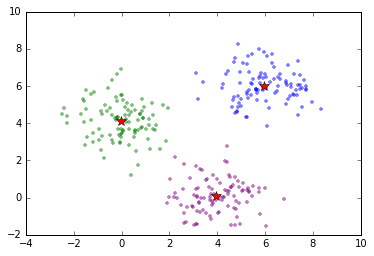

Iteration 20
Within Set Sum of Squared Error (WSSSE) = 578.860382661
Cluster Centers:
[ 5.94885757  6.01525401]
[ 3.9642386   0.10262953]
[-0.04279234  4.13363034]


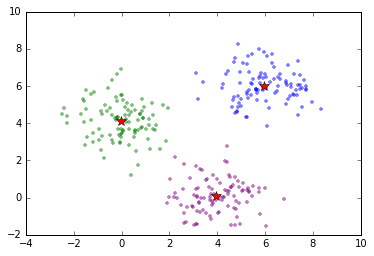

Iteration 100
Within Set Sum of Squared Error (WSSSE) = 578.860382661
Cluster Centers:
[-0.04279234  4.13363034]
[ 5.94885757  6.01525401]
[ 3.9642386   0.10262953]


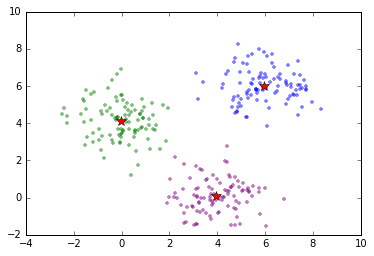

In [115]:
k = 3
iterations = [1, 10, 20, 100]

# create RDD
data = sc.textFile("./data.csv")
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')])).cache()
clusters = None


for iteration in range(1,101):
    # Build the model (cluster the data)
    clusters = KMeans.train(parsedData, k, maxIterations=iteration, runs=1, initializationMode = "random")
    WSSSE = clusters.computeCost(parsedData)
    
    if iteration in iterations:
        print "="*80
        print 'Iteration {}'.format(iteration)
        print "="*80

        print "Within Set Sum of Squared Error (WSSSE) = {1}".format(iteration, WSSSE)
        print 'Cluster Centers:'
        for centroid in clusters.centers:
            print centroid

        # Plot the points & centroids
        plot_iteration(clusters.clusterCenters)

##### Observations
Looking at the centroids from iteration 10,20,100, it looks like the algorithm converges after 10 iterations. 

### ==HW 10.4: ===
Using the KMeans code (homegrown code) provided repeat the experiments in HW10.3. Comment on any differences between the results in HW10.3 and HW10.4. Explain.

<h2>
<span style="color: blue"> Answer</span>
</h2>

In [112]:
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

Iteration 1
Cluster Centers:
[ 1.05336767  0.52992221]
[ 4.01136344  2.74644275]
[ 1.73027751  5.69558801]


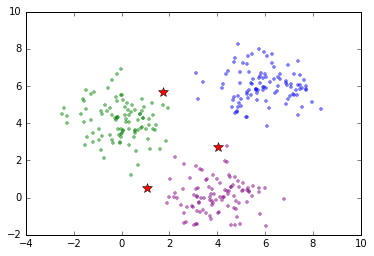

Iteration 10
Cluster Centers:
[ 3.9642386   0.10262953]
[ 5.94885757  6.01525401]
[-0.04279234  4.13363034]


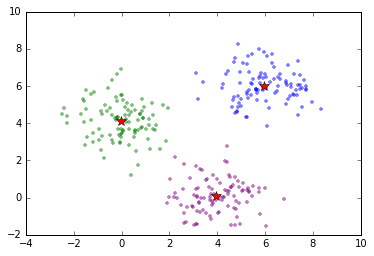

Iteration 20
Cluster Centers:
[ 3.9642386   0.10262953]
[ 5.94885757  6.01525401]
[-0.04279234  4.13363034]


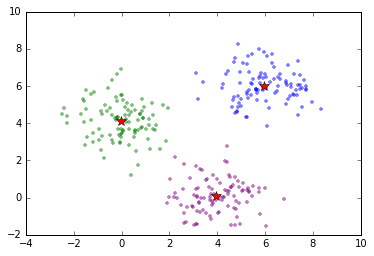

Iteration 100
Cluster Centers:
[ 3.9642386   0.10262953]
[ 5.94885757  6.01525401]
[-0.04279234  4.13363034]


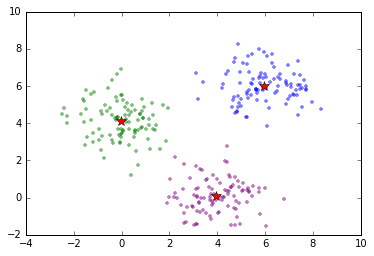

In [114]:
K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])
iterations = [1, 10, 20, 100]

D = sc.textFile("./data.csv").cache()
iter_num = 1
for i in range(1,101):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    centroids = centroids_new
    
    if i in iterations:
        print "="*80
        print 'Iteration {}'.format(i)
        print "="*80

#         print "Within Set Sum of Squared Error (WSSSE) = {1}".format(iteration, WSSSE)
        print 'Cluster Centers:'
        for centroid in centroids:
            print centroid

        # Plot the points & centroids
        plot_iteration(centroids)
    
    iter_num = iter_num + 1 


##### Observations

1. Looking at the centroids and the plot, we can say the algorithm converges after 10 iterations. Even if we run the algorithm for more iterations, there is no change the calculated centroids.
2. Homegrown Cluster centroids output after 100 iterations 

[ 3.9642386   0.10262953]

[ 5.94885757  6.01525401]

[-0.04279234  4.13363034]

Spark Mlib calculated centroid outout after 100 iterations 

[ 5.94885757  6.01525401]

[ 3.9642386   0.10262953]

[-0.04279234  4.13363034]


The centroids from both homegrown Kmeans solution and Spark Mlib Kmeans are same.

### ==HW 10.5: === (OPTIONAL)
Using the KMeans code provided modify it to do a weighted KMeans and repeat the experiements in HW10.3. Comment on any differences between the results in HW10.3 and HW10.5. Explain.

NOTE: Weight each example as follows using the inverse vector length (Euclidean norm): 

weight(X)= 1/||X||, 

where ||X|| = SQRT(X.X)= SQRT(X1^2 + X2^2)

Here X is vector made up of X1 and X2.

### ==HW 10.6: Linear Regression ===  (OPTIONAL)
HW 10.6.1
Using the following linear regression notebook:

 https://www.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb?dl=0 

Generate 2 sets of data with 100 data points using the data generation code provided and plot each in separate plots. Call one the training set and the other the testing set.

Using MLLib's LinearRegressionWithSGD train up a linear regression model with the training dataset and evaluate with the testing set. What a good number of iterations for training the linear regression model? Justify with plots and words. 



In [1]:
#Data Generation
import numpy as np
import csv
def data_generate(fileName, w=[0,0], size=100):
    np.random.seed(0)
    x = np.random.uniform(-4, 4, size)
    noise = np.random.normal(0, 2, size)
    y = (x * w[0] + w[1] + noise)
    data = zip(y, x)
    with open(fileName,'wb') as f:
        writer = csv.writer(f)
        for row in data:
            writer.writerow(row)
    return True

In [32]:
# plot data
%matplotlib inline
import matplotlib.pyplot as plt
def dataPlot(file, w):
    with open(file, 'r') as f:
        reader = csv.reader(f)
        for row in reader:
            plt.plot(float(row[1]), float(row[0]),'o'+'r')
    plt.xlabel("x")
    plt.ylabel("y")
    x = [-4, 4]
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x,y, linewidth=2.0)
    plt.grid()
    plt.show()

The true y = 8x - 2

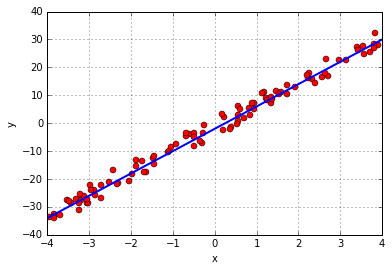

In [30]:
#generate training set and plot it 
w = [8,-2]
data_generate('train.csv', w, 100)
dataPlot('train.csv',w)

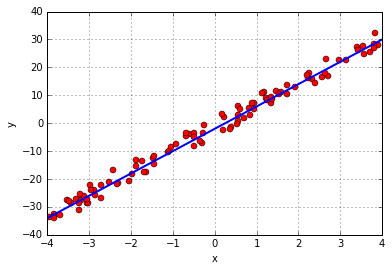

In [34]:
#generate test set and plot it 
w = [8,-2]
data_generate('test.csv', w, 100)
dataPlot('test.csv',w)

Number of iterations :  1
(weights=[43.420647014], intercept=-3.356525583044622)
Mean Squared Error = 6773.23731301
Number of iterations :  10
(weights=[-298.445355872], intercept=13.616204267077855)
Mean Squared Error = 506216.356076
Number of iterations :  15
(weights=[16.7683204364], intercept=-2.05546494112727)
Mean Squared Error = 419.942124701
Number of iterations :  20
(weights=[7.97257579041], intercept=-1.6181780801746715)
Mean Squared Error = 3.9704873112
Number of iterations :  25
(weights=[7.98393748404], intercept=-1.6187449131887346)
Mean Squared Error = 3.96975506862
Number of iterations :  30
(weights=[7.98393748404], intercept=-1.6187449131887346)
Mean Squared Error = 3.96975506862
Number of iterations :  40
(weights=[7.98393748404], intercept=-1.6187449131887346)
Mean Squared Error = 3.96975506862
Number of iterations :  50
(weights=[7.98393748404], intercept=-1.6187449131887346)
Mean Squared Error = 3.96975506862
Number of iterations :  75
(weights=[7.98393748404], i

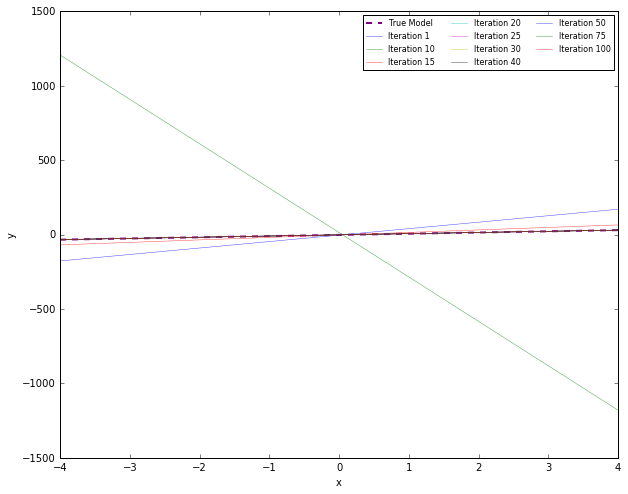

In [73]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel

iterations = [1, 10, 15, 20, 25,30,40, 50,75,100]
# iterations = [1,25]
# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[0], values[1:])

data = sc.textFile("train.csv")
trainData = data.map(parsePoint).cache()

tmpData = sc.textFile('test.csv')
testData = tmpData.map(parsePoint).cache()

plt.figure(figsize=(10,8))
w = [8,-2]
plt.xlabel("x")
plt.ylabel("y")
x = [-4, 4]
y = [(i * w[0] + w[1]) for i in x]
plt.plot(x,y, linewidth=2.0,label='True Model',linestyle='--',color='purple')

for itr in iterations:
    print "Number of iterations : ",itr
    # Build the model
    model = LinearRegressionWithSGD.train(trainData, intercept=True, iterations=itr)
    print model

    # Evaluate the model on test data
    valuesAndPreds = testData.map(lambda p: (p.label, model.predict(p.features)))
    MSE = valuesAndPreds.map(lambda (v, p): (v - p)**2).reduce(lambda x, y: x + y) / valuesAndPreds.count()
    print("Mean Squared Error = " + str(MSE))
    
    y = [(i * model.weights[0] + model.intercept) for i in x]
    plt.plot(x,y,linewidth=0.5,label='Iteration {}'.format(itr),alpha=0.7)
    plt.legend(loc='upper right', numpoints=1, ncol=3, fontsize=8)
   


Looking at the graph and the Mean Squared Error, we can say that the model converges after 25 iterations. 

### HW 10.6.2
In the notebook provide, in the cell labeled "Gradient descent (regularization)".

Fill in the blanks and get this code to work for LASS0 and RIDGE linear regression.

Using the data from 10.6.1 tune the hyper parameters of your LASS0 and RIDGE regression. Report your findings with words and plots.

In [43]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel
data = [LabeledPoint(0.0, [0.0, 1.0]),LabeledPoint(1.0, [1.0, 0.0]) ]
print data

[LabeledPoint(0.0, [0.0,1.0]), LabeledPoint(1.0, [1.0,0.0])]


In [44]:
valuesAndPreds = data.map(lambda p: p.label)

AttributeError: 'list' object has no attribute 'map'